import neccesory libraries

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stat
import re
import seaborn as sns
import matplotlib.pyplot as plt 



In [5]:
# load the scrapped dataset 
df = pd.read_csv('https://raw.githubusercontent.com/Harshad1025/JustWatch-Scraper-Analytics/master/TV_shows_data/Tvshows_data.csv')

In [6]:
df.shape

(135, 5)

In [7]:
# first view of data set
df.head()

,Show Title,Release Year,IMDb Rating,Show Link,Stream
0,Scream: The TV Series,(2015),7.0,/in/tv-show/scream,NaN
1,The King of TV,(2022),7.4,/in/tv-show/the-king-of-tv,NaN
2,Network,(1976),8.1,/in/movie/network,"Amazon Prime Video, Amazon Video, Apple TV"
3,Daniel Sloss: Live Shows,(2018),8.5,/in/tv-show/daniel-sloss-live-shows,Netflix
4,Loki,(2021),8.2,/in/tv-show/loki,Hotstar


In [11]:
df.tail()

,Show Title,Release Year,IMDb Rating,Show Link,Stream
130,Hawkeye,(2021),7.5,/in/tv-show/hawkeye-2021,Hotstar
131,BLACK AND WHITE TV,(2019),NaN,/in/movie/black-and-white-tv,NaN
132,Kemurikusa,(2019),6.7,/in/tv-show/kemurikusa,Amazon Prime Video
133,Little Manhattan,(2005),7.4,/in/movie/little-manhattan,"Amazon Video, Google Play Movies"
134,Level,(2021),3.1,/in/movie/level,Tubi TV


In [12]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Show Title    135 non-null    object 
 1   Release Year  135 non-null    object 
 2   IMDb Rating   123 non-null    float64
 3   Show Link     135 non-null    object 
 4   Stream        75 non-null     object 
dtypes: float64(1), object(4)
memory usage: 5.4+ KB


In [13]:
# check wheather null values are present in the dataset 
df.isnull().sum()

Show Title       0
Release Year     0
IMDb Rating     12
Show Link        0
Stream          60
dtype: int64

In [14]:
# check duplicate rows
df.duplicated().sum()

15

In [15]:
# dataset columns
df.columns

Index(['Show Title', 'Release Year', 'IMDb Rating', 'Show Link', 'Stream'], dtype='object')

In [16]:
# Remove non-numeric characters and convert to number for 'Release Year' column
df['Release Year'] = df['Release Year'].apply(lambda x: re.sub('[^0-9]', '', x)).astype(int)


In [17]:
# statistical summary about dataset
df.describe()

,Release Year,IMDb Rating
count,135.000000,123.00000
mean,2011.207407,6.92439
std,13.821407,1.07080
min,1952.000000,3.10000
25%,2005.000000,6.35000
50%,2016.000000,7.10000
75%,2021.000000,7.70000
max,2024.000000,9.10000


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(120, 5)

In [20]:
missing_values_df = df[df.isna().any(axis=1)]
missing_values_df.head()

,Show Title,Release Year,IMDb Rating,Show Link,Stream
0,Scream: The TV Series,2015,7.0,/in/tv-show/scream,NaN
1,The King of TV,2022,7.4,/in/tv-show/the-king-of-tv,NaN
5,Catfish: The TV Show,2012,7.1,/in/tv-show/catfish-the-tv-show,NaN
8,Moeyo Ken TV,2005,6.3,/in/tv-show/moeyo-ken-tv,NaN
9,Showrunners: The Art of Running a TV Show,2014,6.7,/in/movie/showrunners-the-art-of-running-a-tv-...,NaN


<Axes: >

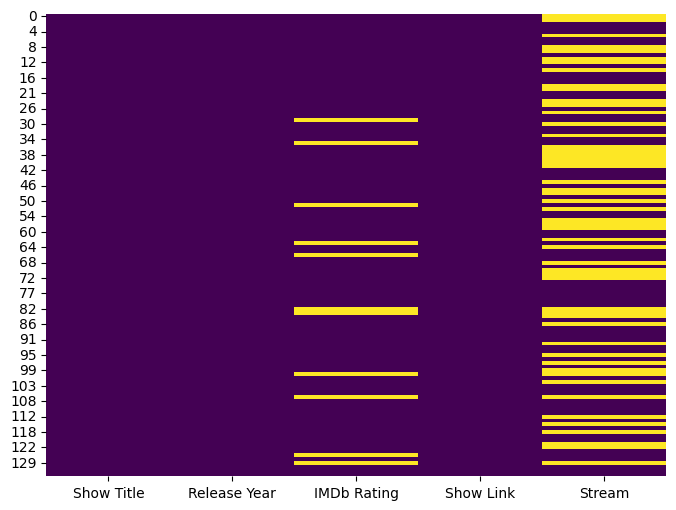

In [21]:
# Visualising mising values with heatmap 

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [22]:
# randomly inspecting data
df.sample()

,Show Title,Release Year,IMDb Rating,Show Link,Stream
51,TV in Black: The First Fifty Years,2004,NaN,/in/movie/tv-in-black-the-first-fifty-years,Tubi TV


In [23]:
df['Release Year'].isna().sum()

0

## a. Data filtering 

 - Only include movies and TV shows released in the last 2 years (from the current date).

In [24]:
current_year = pd.Timestamp.now().year
current_year

2024

In [25]:
# Get the current year
current_year = pd.Timestamp.now().year 

# Calculate the year 2 years ago from the current year
two_years_ago_year = current_year - 2

date_filtered_df = df[df['Release Year']>two_years_ago_year]


In [26]:
date_filtered_df.sample(5)

,Show Title,Release Year,IMDb Rating,Show Link,Stream
99,May December,2023,6.9,/in/movie/may-december,NaN
94,Saw X,2023,6.6,/in/movie/saw-x,"Lionsgate Play, Apple TV, Apple TV"
60,Avalon TV,2023,6.4,/in/tv-show/avalon-tv,WOW Presents Plus
89,Landscape with Invisible Hand,2023,6.0,/in/movie/landscape-with-invisible-hand,Amazon Prime Video
84,Anatomy of a Fall,2023,7.8,/in/movie/anatomie-dune-chute,NaN


- Only include movies and TV shows with an IMDb rating of 7 or higher.

In [27]:
filtered_df = date_filtered_df[date_filtered_df['IMDb Rating']>=7]

In [28]:
filtered_df

,Show Title,Release Year,IMDb Rating,Show Link,Stream
61,Buddy Daddies,2023,7.9,/in/tv-show/buddy-daddies,Crunchyroll
84,Anatomy of a Fall,2023,7.8,/in/movie/anatomie-dune-chute,NaN


## b. Data Analysis:

- Calculate the average IMDb rating for the scraped  TV shows.
      

In [29]:
avg_imdb_rating = df['IMDb Rating'].mean()
print(f"Average IMDB Rating for scrapped movies: {round(avg_imdb_rating,2)}")

Average IMDB Rating for scrapped movies: 6.9


- Identify the top 5 Shows that have the Highest IMDB rating

In [30]:
top_5_movies_by_Imdb_rating = df.sort_values(by = 'IMDb Rating',ascending=False).head()
top_5_movies_by_Imdb_rating[['Show Title','IMDb Rating']]

,Show Title,IMDb Rating
76,Brain Candy TV,9.1
15,Mahabharat,8.9
70,Das Boot,8.8
95,The Silence of the Lambs,8.6
3,Daniel Sloss: Live Shows,8.5


- Determine the streaming service with the most significant number of offerings.

In [31]:
# Split entries in the 'Stream' column into individual streaming services
stream_list = df['Stream'].str.split(', ')

# Flatten the list of streaming services
stream_flat_list = [stream for sublist in stream_list.dropna() for stream in sublist]

# Count the occurrences of each streaming service
stream_counts = pd.Series(stream_flat_list).value_counts()

# Determine the streaming service with the most significant number of offerings
most_common_service = stream_counts.idxmax()
number_of_offerings = stream_counts.max()

print(f"The streaming service with the most significant number of offerings is '{most_common_service}' with {number_of_offerings} offerings.")


The streaming service with the most significant number of offerings is 'Apple TV' with 13 offerings.


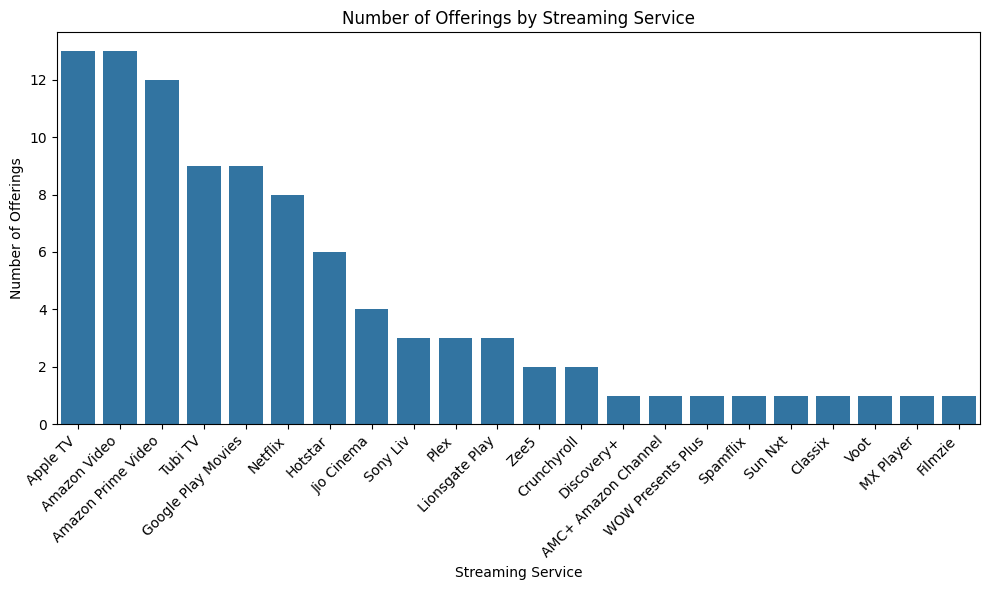

In [32]:


plt.figure(figsize=(10, 6))
sns.barplot(stream_counts)
plt.title('Number of Offerings by Streaming Service')
plt.xlabel('Streaming Service')
plt.ylabel('Number of Offerings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- top 10 release years

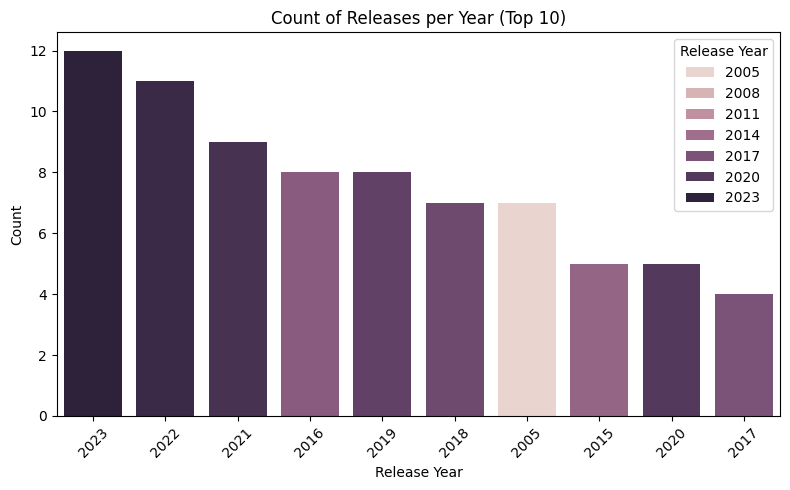

In [33]:

# Get the top 10 release years and their counts
top_10_release_years = df['Release Year'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 release years
df_top_10 = df[df['Release Year'].isin(top_10_release_years)]

# Calculate the count of releases for each year
release_year_counts = df_top_10['Release Year'].value_counts()

# Sort the counts in descending order and get the index
sorted_index = release_year_counts.sort_values(ascending=False).index



# Set the figure size
plt.figure(figsize=(8, 5))

# Create count plot for the top 10 release years
sns.countplot(x='Release Year', data=df_top_10,order=sorted_index, hue='Release Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count of Releases per Year (Top 10)')

# Show plot
plt.tight_layout()
plt.show()


In [34]:
df.to_csv('cleaned_tvshow_data.csv', index=False)



Upon scraping TV show data from JustWatch, we obtained a dataset containing 135 entries. However, upon inspection, we found some data issues to address. There are 12 missing IMDb ratings and 60 missing streaming service values. Furthermore, we identified 15 duplicate rows in the dataset.

After cleaning and processing the data, we filtered it based on specific criteria. We included only TV shows released in the last two years and with an IMDb rating of 7 or higher.

Moving on to data analysis, we calculated the average IMDb rating for the scraped TV shows, which was found to be 6.9. Additionally, we identified the top 5 TV shows with the highest IMDb ratings, showcasing a diverse range of popular titles.

Furthermore, we determined that 'Apple TV' emerged as the streaming service with the most significant number of offerings among the scraped TV shows.

Finally, we explored the distribution of TV show releases over the years, highlighting the top 10 release years, providing valuable insights into trends within the TV show landscape.

Overall, this project involved scraping, cleaning, and analyzing TV show data from JustWatch, providing insights into TV show ratings, streaming services, and release trends.

**Conclusion** 📊🔍📈

After scraping TV show data from JustWatch, we obtained a dataset with 135 entries. However, data issues were observed: 12 missing IMDb ratings and 60 missing streaming service values, along with 15 duplicate rows.

**Data Filtering** 🧹

- Only TV shows released in the last two years with an IMDb rating of 7 or higher were included.

**Data Analysis** 📊

- Average IMDb rating for scraped TV shows: 6.9 🎬📝
  
- Top 5 TV shows with highest IMDb ratings:
  1. Brain Candy TV - 9.1 🧠🍬
  2. Mahabharat - 8.9 ⚔️
  3. Das Boot - 8.8 🛳️
  4. The Silence of the Lambs - 8.6 🐑🔇
  5. Daniel Sloss: Live Shows - 8.5 🎤

- Streaming service with most significant offerings: 'Apple TV' with 13 offerings 🍏📺

- Top 10 release years:
  - 2023, 2022, 2021, 2016, 2019, 2018, 2005, 2015, 2020, 2017 📅

This project involved scraping, cleaning, and analyzing TV show data from JustWatch, providing insights into TV show ratings, streaming services, and release trends. 📉📊🔍